In [54]:
import pandas as pd
import numpy as np
from datetime import datetime

cur_state_file = "../second_collection_slower/current_state.csv"
# cur_state_file = "../test_cs/current_state.csv"
ref_state_file = "../second_collection_slower/reference_state.csv"

def read_csv(cur_state_file, ref_state_file):
    
    cur_states = pd.read_csv(cur_state_file)
    cur_states['timestamp'] = cur_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
    cur_states['ref_state'] = np.nan
#     cur_states = cur_states.sort_values(by='timestamp')
    cur_states.reset_index(drop=True, inplace=True)
    cur_states['state_vector'] = cur_states['state_vector'].apply(lambda s: eval(s)[3:5] + [eval(s)[8]])
    
    ref_states = pd.read_csv(ref_state_file)
    ref_states['timestamp'] = ref_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
    
    return cur_states, ref_states

cur_states, ref_states = read_csv(cur_state_file, ref_state_file)

In [72]:
def match_cur_ref(cur_states, ref_states):

    ref_index = 0
    ref_timestamp = ref_states['timestamp'][0]
    refs = []
    ref_size = len(ref_states)
    cur_states_sorted = cur_states.sort_values(by='timestamp')
    
    for cur_index, row in cur_states_sorted.iterrows():
        if ref_index + 1 >= ref_size:
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        elif row['timestamp'] > ref_states['timestamp'][ref_index+1]:
            ref_index += 1
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        elif row['timestamp'] > ref_states['timestamp'][ref_index]:
            refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
        else:
            # Error msg
            print(cur_index, row['timestamp'], ref_states['timestamp'][ref_index])
            refs.append(np.nan)
    cur_states['ref_state'] = refs
    return
match_cur_ref(cur_states, ref_states)

0 2022-04-18 11:33:36.246314 2022-04-18 11:33:36.612339
1 2022-04-18 11:33:36.251873 2022-04-18 11:33:36.612339
2 2022-04-18 11:33:36.257399 2022-04-18 11:33:36.612339
3 2022-04-18 11:33:36.262923 2022-04-18 11:33:36.612339
4 2022-04-18 11:33:36.269033 2022-04-18 11:33:36.612339
5 2022-04-18 11:33:36.274107 2022-04-18 11:33:36.612339
6 2022-04-18 11:33:36.279646 2022-04-18 11:33:36.612339
7 2022-04-18 11:33:36.285180 2022-04-18 11:33:36.612339
8 2022-04-18 11:33:36.290723 2022-04-18 11:33:36.612339
9 2022-04-18 11:33:36.296344 2022-04-18 11:33:36.612339
10 2022-04-18 11:33:36.301875 2022-04-18 11:33:36.612339
11 2022-04-18 11:33:36.307445 2022-04-18 11:33:36.612339
12 2022-04-18 11:33:36.312962 2022-04-18 11:33:36.612339
13 2022-04-18 11:33:36.318499 2022-04-18 11:33:36.612339
14 2022-04-18 11:33:36.324064 2022-04-18 11:33:36.612339
15 2022-04-18 11:33:36.329784 2022-04-18 11:33:36.612339
16 2022-04-18 11:33:36.335245 2022-04-18 11:33:36.612339
17 2022-04-18 11:33:36.340761 2022-04-18 

In [73]:
cur_states.to_csv("processed_states.csv")

In [74]:
cur_states_dropna = cur_states.dropna()
cur_states_list = cur_states_dropna["state_vector"].tolist()
ref_states_list = cur_states_dropna["ref_state"].tolist()

with open("cur_states.npy", "wb") as f:
    np.save(f, np.array(cur_states_list))
with open("ref_states.npy", "wb") as f:
    np.save(f, np.array(ref_states_list))

In [56]:
cur_states = pd.read_csv(cur_state_file)
cur_states['state_vector'] = cur_states['state_vector'].apply(lambda s: eval(s)[3:5] + [eval(s)[8]])
cur_states['timestamp'] = cur_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))

sorted_curs = cur_states.sort_values(by='timestamp')

test_curs = np.array(cur_states["state_vector"].tolist())
test_curs

array([[ 0.02312665, -0.23821931,  0.05927306],
       [ 0.01012857, -0.25176449,  0.05747288],
       [-0.00471646, -0.25484604,  0.05586979],
       ...,
       [ 0.23820026,  0.40960215, -0.05121393],
       [ 0.26307214,  0.44688102, -0.05174238],
       [ 0.27222484,  0.45576792, -0.05256289]])

(1000.0, 2000.0)

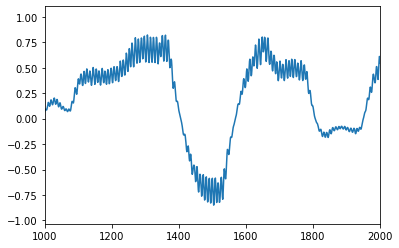

In [60]:
import matplotlib.pyplot as plt

plt.plot(range(5000), test_curs[:5000, 1])
plt.xlim(1000, 2000)

In [67]:
cur_states[850:900]

,time,header,state_vector,state_valid,timestamp
850,2022/04/18 11:33:40.979642377,"{'stamp': {'secs': 1650278020, 'nsecs': 979564...","[-0.6780769236079954, -0.40447256182451646, -0...",0,2022-04-18 11:33:40.979642
851,2022/04/18 11:33:40.985180719,"{'stamp': {'secs': 1650278020, 'nsecs': 985120...","[-0.6825681370954207, -0.4102477220060027, 0.0...",0,2022-04-18 11:33:40.985180
852,2022/04/18 11:33:40.990775023,"{'stamp': {'secs': 1650278020, 'nsecs': 990670...","[-0.7384418869512928, -0.44656212458713807, 0....",0,2022-04-18 11:33:40.990775
853,2022/04/18 11:33:40.996302838,"{'stamp': {'secs': 1650278020, 'nsecs': 996224...","[-0.8265648523095968, -0.5024698924257568, 0.0...",0,2022-04-18 11:33:40.996302
854,2022/04/18 11:33:41.1877119,"{'stamp': {'secs': 1650278021, 'nsecs': 178690...","[-0.8988525427731435, -0.5509093136069507, 0.0...",0,2022-04-18 11:33:41.187700
855,2022/04/18 11:33:41.7419285,"{'stamp': {'secs': 1650278021, 'nsecs': 734159...","[-0.935621737528647, -0.5800090787573932, 0.01...",0,2022-04-18 11:33:41.741900
856,2022/04/18 11:33:41.12952782,"{'stamp': {'secs': 1650278021, 'nsecs': 128942...","[-0.8919746342643179, -0.5591903367087849, 0.0...",0,2022-04-18 11:33:41.129520
857,2022/04/18 11:33:41.18502551,"{'stamp': {'secs': 1650278021, 'nsecs': 184493...","[-0.8142436386850087, -0.5158551672785627, 0.0...",0,2022-04-18 11:33:41.185020
858,2022/04/18 11:33:41.24071443,"{'stamp': {'secs': 1650278021, 'nsecs': 240073...","[-0.723032994394664, -0.4622550826553556, 0.01...",0,2022-04-18 11:33:41.240710
859,2022/04/18 11:33:41.29607340,"{'stamp': {'secs': 1650278021, 'nsecs': 295514...","[-0.6476885889134623, -0.4164910340958037, 0.0...",0,2022-04-18 11:33:41.296070


In [62]:
sorted_curs[1000:1050]

,time,header,state_vector,state_valid,timestamp
1003,2022/04/18 11:33:41.832395031,"{'stamp': {'secs': 1650278021, 'nsecs': 829558...","[0.6873661396330485, 0.09012769375714196, 0.01...",0,2022-04-18 11:33:41.832395
1004,2022/04/18 11:33:41.835212117,"{'stamp': {'secs': 1650278021, 'nsecs': 835126...","[0.6126808910677478, 0.08613404205622703, 0.01...",0,2022-04-18 11:33:41.835212
1005,2022/04/18 11:33:41.840803598,"{'stamp': {'secs': 1650278021, 'nsecs': 840680...","[0.5624337443212031, 0.08449429961791527, 0.02...",0,2022-04-18 11:33:41.840803
1006,2022/04/18 11:33:41.846309076,"{'stamp': {'secs': 1650278021, 'nsecs': 846231...","[0.5809402553766175, 0.09340112439543057, 0.02...",0,2022-04-18 11:33:41.846309
1007,2022/04/18 11:33:41.851862060,"{'stamp': {'secs': 1650278021, 'nsecs': 851782...","[0.6448049169249331, 0.11049846030764902, 0.02...",0,2022-04-18 11:33:41.851862
869,2022/04/18 11:33:41.85194434,"{'stamp': {'secs': 1650278021, 'nsecs': 851153...","[-0.6410385720396772, -0.45365704455046907, 0....",0,2022-04-18 11:33:41.851940
1008,2022/04/18 11:33:41.857417837,"{'stamp': {'secs': 1650278021, 'nsecs': 857336...","[0.7214392855767302, 0.13083607692242472, 0.02...",0,2022-04-18 11:33:41.857417
1009,2022/04/18 11:33:41.862952096,"{'stamp': {'secs': 1650278021, 'nsecs': 862894...","[0.7852736270251497, 0.1498335069154438, 0.020...",0,2022-04-18 11:33:41.862952
1010,2022/04/18 11:33:41.868546616,"{'stamp': {'secs': 1650278021, 'nsecs': 868458...","[0.8032033626029617, 0.15938981722354206, 0.02...",0,2022-04-18 11:33:41.868546
1011,2022/04/18 11:33:41.874104003,"{'stamp': {'secs': 1650278021, 'nsecs': 874023...","[0.7526600932332593, 0.15426205263567902, 0.01...",0,2022-04-18 11:33:41.874104


In [64]:
sorted_curs[850:900]

,time,header,state_vector,state_valid,timestamp
850,2022/04/18 11:33:40.979642377,"{'stamp': {'secs': 1650278020, 'nsecs': 979564...","[-0.6780769236079954, -0.40447256182451646, -0...",0,2022-04-18 11:33:40.979642
851,2022/04/18 11:33:40.985180719,"{'stamp': {'secs': 1650278020, 'nsecs': 985120...","[-0.6825681370954207, -0.4102477220060027, 0.0...",0,2022-04-18 11:33:40.985180
852,2022/04/18 11:33:40.990775023,"{'stamp': {'secs': 1650278020, 'nsecs': 990670...","[-0.7384418869512928, -0.44656212458713807, 0....",0,2022-04-18 11:33:40.990775
853,2022/04/18 11:33:40.996302838,"{'stamp': {'secs': 1650278020, 'nsecs': 996224...","[-0.8265648523095968, -0.5024698924257568, 0.0...",0,2022-04-18 11:33:40.996302
872,2022/04/18 11:33:41.101917010,"{'stamp': {'secs': 1650278021, 'nsecs': 101789...","[-0.7913832641484506, -0.5662280839648898, 0.0...",0,2022-04-18 11:33:41.101917
873,2022/04/18 11:33:41.107417244,"{'stamp': {'secs': 1650278021, 'nsecs': 107343...","[-0.8660765257757772, -0.6204255125371703, 0.0...",0,2022-04-18 11:33:41.107417
874,2022/04/18 11:33:41.112978038,"{'stamp': {'secs': 1650278021, 'nsecs': 112895...","[-0.8905744772917403, -0.6381939804841447, 0.0...",0,2022-04-18 11:33:41.112978
875,2022/04/18 11:33:41.118478034,"{'stamp': {'secs': 1650278021, 'nsecs': 118412...","[-0.8379258780088733, -0.6018469650750048, 0.0...",0,2022-04-18 11:33:41.118478
876,2022/04/18 11:33:41.124382361,"{'stamp': {'secs': 1650278021, 'nsecs': 124019...","[-0.7554675957971203, -0.5440121575706927, 0.0...",0,2022-04-18 11:33:41.124382
856,2022/04/18 11:33:41.12952782,"{'stamp': {'secs': 1650278021, 'nsecs': 128942...","[-0.8919746342643179, -0.5591903367087849, 0.0...",0,2022-04-18 11:33:41.129520


In [69]:
cur_states

,time,header,state_vector,state_valid,timestamp
0,2022/04/18 11:33:36.246314379,"{'stamp': {'secs': 1650278016, 'nsecs': 246238...","[0.02312664697392619, -0.23821931177051323, 0....",0,2022-04-18 11:33:36.246314
1,2022/04/18 11:33:36.251873397,"{'stamp': {'secs': 1650278016, 'nsecs': 251790...","[0.010128566559293922, -0.2517644937177989, 0....",0,2022-04-18 11:33:36.251873
2,2022/04/18 11:33:36.257399056,"{'stamp': {'secs': 1650278016, 'nsecs': 257326...","[-0.004716459867584209, -0.25484603936772177, ...",0,2022-04-18 11:33:36.257399
3,2022/04/18 11:33:36.262923727,"{'stamp': {'secs': 1650278016, 'nsecs': 262857...","[-0.021178120108066717, -0.2389269708096124, 0...",0,2022-04-18 11:33:36.262923
4,2022/04/18 11:33:36.269033797,"{'stamp': {'secs': 1650278016, 'nsecs': 268465...","[-0.03580849657532846, -0.20828282023271683, 0...",0,2022-04-18 11:33:36.269033
...,...,...,...,...,...
179003,2022/04/18 11:50:10.801922935,"{'stamp': {'secs': 1650279010, 'nsecs': 801743...","[0.18754765416569158, 0.32502710632651405, -0....",0,2022-04-18 11:50:10.801922
179004,2022/04/18 11:50:10.807429233,"{'stamp': {'secs': 1650279010, 'nsecs': 807262...","[0.21013857587059454, 0.36413289518422337, -0....",0,2022-04-18 11:50:10.807429
179005,2022/04/18 11:50:10.813013529,"{'stamp': {'secs': 1650279010, 'nsecs': 812818...","[0.23820026300840288, 0.4096021483448422, -0.0...",0,2022-04-18 11:50:10.813013
179006,2022/04/18 11:50:10.818818946,"{'stamp': {'secs': 1650279010, 'nsecs': 818399...","[0.2630721428382361, 0.4468810180740005, -0.05...",0,2022-04-18 11:50:10.818818


In [70]:
ref_states

,time,header,pn,pe,pd,vn,ve,vd,yaw,an,ae,ad,timestamp
0,2022/04/18 11:33:36.612339052,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,-0.634277,0.024837,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:33:36.612339
1,2022/04/18 11:33:37.472354453,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.651453,-0.709689,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:33:37.472354
2,2022/04/18 11:33:38.352285988,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,-0.314009,0.750998,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:33:38.352285
3,2022/04/18 11:33:39.162325548,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.408491,0.968640,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:33:39.162325
4,2022/04/18 11:33:39.842505506,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,-0.450830,-0.652409,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:33:39.842505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022/04/18 11:50:10.252475564,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.341752,0.521705,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:50:10.252475
1313,2022/04/18 11:50:10.772597156,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.134912,0.703841,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:50:10.772597
1314,2022/04/18 11:50:11.442529420,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.436825,0.155020,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:50:11.442529
1315,2022/04/18 11:50:12.22608114,"{'stamp': {'secs': 0, 'nsecs': 0}, 'frame_id':...",0.0,0.0,0.0,0.299475,0.164825,0.0,0.0,0.0,0.0,0.0,2022-04-18 11:50:12.226080
